In [3]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# for display
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# <a id='0'>Time Series

## Highlights

- <a href='#holiday'>Create Business Days excluding US Federal Holidays 
- <a href='#pct'>Compute percent changes in the Series

## Contents
- <a href='#p'> Python: Datetime-related Data Types and their Methods
    - Datetime, timedelta, tzinfo
    - Inter-conversion b/t String and Datetime
- <a href='#pa'>Pandas: Time Series Basics
    - <a href='#d'> Date Ranges and Shifting
    - <a href='#t'> Time Zone Handling
    - <a href='#pe'>Periods and Period Arithmetic
    - <a href='#r'> Resampling and Frequency Conversion
    - <a href='#m'> Moving Window Functions

## <a id='p'> Python: Datetime

Data Types

- datetime, timedelta
- date, time, tzinfo(time zone related)

### Datetime
A Datetime object contains two parts that can be accessed by: date( ) & time( ), each part contains multiple attributes

datetime( year, month, day, hour, minute, second)

#### Task: print current date & time

In [10]:
t = datetime.now() # datetime here refers to the class, 
                   # not the class method such as datetime(2020,3,16)

t
type(t)

t.date(), t.time()

t.year, t.month,  t.day
t.hour, t.minute, t.second

datetime.datetime(2020, 4, 14, 9, 52, 33, 102458)

datetime.datetime

(datetime.date(2020, 4, 14), datetime.time(9, 52, 33, 102458))

(2020, 4, 14)

(9, 52, 33)

### Timedelta
The temporal difference, it can be used to create time-shifted datetime objects. It has two attributes: days & seconds

timedelta(days, seconds)

In [12]:
dt = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
dt
dt.days, dt.seconds

datetime.timedelta(days=926, seconds=56700)

(926, 56700)

#### Task: find the date & time of _10 weeks and 2 hours ago_

In [13]:
from datetime import timedelta

t = datetime.now()
t - timedelta(days=10*7, seconds=7200)

datetime.datetime(2020, 2, 4, 7, 59, 15, 986177)

### Inter-conversion b/t String and Datetime
A very common, must-know operation!

#### Using Python's datetime methods
ft. datetime_object.strftime( ) & datetime.strptime( )

##### From Datetime Object to String

In [24]:
stamp = datetime(2020,3,15,8)

In [19]:
str_format = 'Today is %m/%d, %Y'  #Problem: need to remove the 0 in the month
stamp.strftime(str_format)

'Today is 03/15, 2020'

In [22]:
str_format = 'Today is %-m/%d, %Y'  #Solution: note the '-', use '#' for Windows OS.
stamp.strftime(str_format)

'Today is 3/15, 2020'

In [23]:
# An alternative
'Today is {}/{}, {}'.format(stamp.month, stamp.day, stamp.year)

'Today is 3/15, 2020'

##### Parse a String to Create a Datetime Object

In [37]:
t_str      = "Here is the datetime info: Apr 1st, 2020"
str_format = "Here is the datetime info: %m %dst, %Y"
stamp = datetime.strptime(t_str.replace('Apr', '04'), str_format)
stamp

datetime.datetime(2020, 4, 1, 0, 0)

#### Parse multiple strings: Python vs Pandas

In [26]:
date_strs = ['7/6/2011 09:00', '8/6/2011 10:00']

Brute-force Python

In [27]:
dates = [datetime.strptime(st, '%m/%d/%Y %H:%M') for st in date_strs]
dates

[datetime.datetime(2011, 7, 6, 9, 0), datetime.datetime(2011, 8, 6, 10, 0)]

Using Pandas<br>
(More details in the next section)

In [28]:
# Smart conversion
pd.to_datetime(date_strs)

DatetimeIndex(['2011-07-06 09:00:00', '2011-08-06 10:00:00'], dtype='datetime64[ns]', freq=None)

In [30]:
# European day-first style
pd.to_datetime(date_strs, dayfirst=True)

DatetimeIndex(['2011-06-07 09:00:00', '2011-06-08 10:00:00'], dtype='datetime64[ns]', freq=None)

In [33]:
# Parse a string with irregular delimiters
odd_strs = ['5|1|2017','6|2|2018']
pd.to_datetime(odd_strs, format='%m|%d|%Y')

DatetimeIndex(['2017-05-01', '2018-06-02'], dtype='datetime64[ns]', freq=None)

## <a id='pa'>Pandas: Time Series Basics
<a href='#0'> Back to TOC

### Access the Time Series: Indexing and Selection

In [34]:
np.random.seed(42)
ts = pd.DataFrame({'A':np.random.randn(1000),
                   'B':np.random.randn(1000)
                  },
                  index=pd.date_range('1/1/2000', periods=1000, freq='D'))
ts.head(3)

,A,B
2000-01-01,0.496714,1.399355
2000-01-02,-0.138264,0.924634
2000-01-03,0.647689,0.059630


#### Access with a String, a Python datetime or a Pandas timestamp

In [40]:
# String date
ts.loc['1/2/2000'] # flexible
ts.loc['2000-01-02'] 

# Datetime obj
ts.loc[datetime(2000,1,2)]

# Timestamp
stamp = pd.Timestamp('1/2/2000')
ts.loc[stamp]

A   -0.138264
B    0.924634
Name: 2000-01-02 00:00:00, dtype: float64

A   -0.138264
B    0.924634
Name: 2000-01-02 00:00:00, dtype: float64

A   -0.138264
B    0.924634
Name: 2000-01-02 00:00:00, dtype: float64

A   -0.138264
B    0.924634
Name: 2000-01-02 00:00:00, dtype: float64

#### Slicing

In [83]:
ts.loc['1/1/2000':'1/3/2000']

,A,B
2000-01-01,0.496714,1.399355
2000-01-02,-0.138264,0.924634
2000-01-03,0.647689,0.059630


In [82]:
ts.loc[datetime(2000, 1, 1):datetime(2000, 1, 3)]

,A,B
2000-01-01,0.496714,1.399355
2000-01-02,-0.138264,0.924634
2000-01-03,0.647689,0.059630


#### Task: select all entries for May, 2001 and calculate the mean

In [38]:
ts.loc['05/2001'].mean()

A   -0.048987
B    0.193845
dtype: float64

### Time Series with Duplicated Indices
#### Task: merge all entries with the same date and replace the value with the daily mean

In [41]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', 
                          '1/2/2000', '1/2/2000', 
                          '1/3/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(6), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
2000-01-03    5
dtype: int64

In [34]:
dup_ts.groupby(level=0).mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.5
dtype: float64

### <a id='d'>Pandas: Date Ranges, Frequencies, and Shifting
<a href='#0'> Back to TOC

#### Generating Date Ranges with desired frequency

In [91]:
pd.date_range('2012-04-01', '2012-04-4')  # default frequency: day
pd.date_range('2000-01-01', '2000-01-02', freq='4h30min')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04'], dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:30:00',
               '2000-01-01 09:00:00', '2000-01-01 13:30:00',
               '2000-01-01 18:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='270T')

#### Generating Date Ranges with Starting/Ending time and Number of Instances (periods)

In [45]:
# specifiy only start or end
pd.date_range(start='2012-04-01', periods=5)
pd.date_range(end  ='2012-06-01', periods=5)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-05-28', '2012-05-29', '2012-05-30', '2012-05-31',
               '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

Every Saturday

In [95]:
pd.date_range(start='2020-03-28', periods=5, freq='W-Sat')  # every Saturday

DatetimeIndex(['2020-03-28', '2020-04-04', '2020-04-11', '2020-04-18',
               '2020-04-25'],
              dtype='datetime64[ns]', freq='W-SAT')

##### Challenge: special frequencies:
- every 3rd Friday of the month
- every last business day of the month

For more information see the Pandas doc on [time series](https://pandas.pydata.org/docs/user_guide/timeseries.html)

In [97]:
pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
pd.date_range('2000-01-01', '2000-06-01', freq='BM')  # BM:  business month end
                                                      # BMS: business month start

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31'],
              dtype='datetime64[ns]', freq='BM')

##### <a id='holiday'>Challenge: create business days excluding US federal holidays
ft. CustomBusinessDay( )
    
For more information see the Pandas doc on [time series](https://pandas.pydata.org/docs/user_guide/timeseries.html)

<a href='#0'> Back to TOC

In [101]:
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import USFederalHolidayCalendar

us_business_day = CustomBusinessDay(calendar=USFederalHolidayCalendar())
pd.date_range('2020-01-11', '2020-02-01', freq=us_business_day)

DatetimeIndex(['2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq='C')

Note that Martine Luther King Jr. Day (2020-01-20) is excluded above.

##### Challenge: create a set of customized business days
Adding two extra local holidays: 1/15/2020, 1/28/2020

In [104]:
us_business_day = CustomBusinessDay(calendar=USFederalHolidayCalendar(), holidays=['2020-01-15', '2020-01-28'])
pd.date_range('2020-01-11', '2020-02-01', freq=us_business_day)

DatetimeIndex(['2020-01-13', '2020-01-14', '2020-01-16', '2020-01-17',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-29', '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq='C')

#### Shifting Data

In [49]:
np.random.seed(42)
ts = pd.Series(np.random.rand(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))  # M: month end; MS: month start
ts

2000-01-31    0.374540
2000-02-29    0.950714
2000-03-31    0.731994
2000-04-30    0.598658
Freq: M, dtype: float64

##### <a id='pct'>Task: compute percent changes in the Series

<a href='#0'> Back to TOC

In [50]:
pd.concat([ts, ts.shift(1)], axis=1)   # for visual aid only
100 * (ts - ts.shift(1)) / ts.shift(1)

,0,1
2000-01-31,0.374540,NaN
2000-02-29,0.950714,0.374540
2000-03-31,0.731994,0.950714
2000-04-30,0.598658,0.731994


2000-01-31           NaN
2000-02-29    153.835106
2000-03-31    -23.005898
2000-04-30    -18.215377
Freq: M, dtype: float64

#### Changing Datetime with special offsets
ft. Day, MonthEnd, MonthBegin

In [51]:
from pandas.tseries.offsets import Day, MonthEnd, MonthBegin
t = datetime.now()
t

datetime.datetime(2020, 4, 15, 15, 55, 46, 100580)

In [54]:
# Pythonic
t + timedelta(days=3)

# Pandorable
t + Day(3)

datetime.datetime(2020, 4, 18, 15, 55, 46, 100580)

Timestamp('2020-04-18 15:55:46.100580')

In [58]:
pd.Timestamp(t)

# two equivalent expressions
t + MonthEnd()
MonthEnd().rollforward(t)

# two equivalent expressions
t - MonthBegin()
MonthBegin().rollback(t)

Timestamp('2020-04-15 15:55:46.100580')

Timestamp('2020-04-30 15:55:46.100580')

Timestamp('2020-04-30 15:55:46.100580')

Timestamp('2020-04-01 15:55:46.100580')

Timestamp('2020-04-01 15:55:46.100580')

#### Task: calculate monthly averages
ft. resample( )

In [59]:
np.random.seed(42)
ts = pd.Series(np.random.rand(100),
               index=pd.date_range('1/1/2000', periods=100, freq='D'))
ts.head(3)

2000-01-01    0.374540
2000-01-02    0.950714
2000-01-03    0.731994
Freq: D, dtype: float64

In [60]:
# works, but no index
ts.groupby(ts.index.month).mean()

1    0.444047
2    0.492572
3    0.470464
4    0.487073
dtype: float64

In [61]:
# now a better solution with index
ts.groupby(MonthEnd().rollforward).mean()

# Another way: using resample
ts.resample('M').mean()

2000-01-31    0.444047
2000-02-29    0.492572
2000-03-31    0.470464
2000-04-30    0.487073
dtype: float64

2000-01-31    0.444047
2000-02-29    0.492572
2000-03-31    0.470464
2000-04-30    0.487073
Freq: M, dtype: float64

### Python library: Pytz
#### Common Time Zones

In [224]:
from pytz import all_timezones, common_timezones
tzs = common_timezones
[s for s in tzs if 'us/' in s.lower()]
[s for s in tzs if 'central' in s.lower()]

['US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific']

['Canada/Central', 'US/Central']

#### Time Zone Object

In [257]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### <a id='t'>Pandas: Time Zone Handling
<a href='#0'> Back to TOC

### Time Zone Localization and Conversion

In [219]:
np.random.seed(42)
dates = pd.date_range('3/5/2012 9:30', periods=5)
ts = pd.Series(np.random.randn(len(dates)), index=dates)

# by default: time-zone naive
ts.index.dtype
print(ts.index.tz)

dtype('<M8[ns]')

None


#### Add time zone information
ft. tz_localize( )

In [220]:
ts_pacific = ts.tz_localize('US/Pacific')

ts_pacific.index.dtype
ts_pacific.index.tz

datetime64[ns, US/Pacific]

<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>

#### Convert to a different time zone
ft. tz_convert( )

In [225]:
ts_NewYork = ts_pacific.tz_convert('America/New_York')
ts_NewYork.index.dtype

ts_pacific.tz_convert('Europe/Berlin').index.dtype

datetime64[ns, America/New_York]

datetime64[ns, Europe/Berlin]

#### Concatenate two Series with differen Timezoned Index

In [251]:
ts = pd.Series(np.random.randn(5), 
              index = pd.date_range('3/7/2012 9:30', periods=5, freq='B'))

ts = ts.tz_localize('Europe/London')
ts

2012-03-07 09:30:00+00:00    1.356240
2012-03-08 09:30:00+00:00   -0.072010
2012-03-09 09:30:00+00:00    1.003533
2012-03-12 09:30:00+00:00    0.361636
2012-03-13 09:30:00+00:00   -0.645120
Freq: B, dtype: float64

In [252]:
ts2 = ts.tz_convert('Europe/Moscow')
ts2

2012-03-07 13:30:00+04:00    1.356240
2012-03-08 13:30:00+04:00   -0.072010
2012-03-09 13:30:00+04:00    1.003533
2012-03-12 13:30:00+04:00    0.361636
2012-03-13 13:30:00+04:00   -0.645120
Freq: B, dtype: float64

In [255]:
pd.concat([ts, ts2], axis=1) # Datetime index is reset to UTC

,0,1
2012-03-07 09:30:00+00:00,1.356240,1.356240
2012-03-08 09:30:00+00:00,-0.072010,-0.072010
2012-03-09 09:30:00+00:00,1.003533,1.003533
2012-03-12 09:30:00+00:00,0.361636,0.361636
2012-03-13 09:30:00+00:00,-0.645120,-0.645120


In [253]:
ts + ts2

2012-03-07 09:30:00+00:00    2.712480
2012-03-08 09:30:00+00:00   -0.144020
2012-03-09 09:30:00+00:00    2.007066
2012-03-12 09:30:00+00:00    0.723272
2012-03-13 09:30:00+00:00   -1.290240
Freq: B, dtype: float64

### <a id='pe'>Pandas: Periods and Period Arithmetic
Note that the difference between Periods and Datetime is that the former is a duration, not a timestamp.
    
<a href='#0'> Back to TOC

#### Period Frequency Conversion

ft. Period.asfreq( )

In [116]:
p = pd.Period('2007', freq='A-DEC')
p

p.asfreq('M', how='start')
p.asfreq('M', how='end')

# dir(p) # to check for all attributes of p

Period('2007', 'A-DEC')

Period('2007-01', 'M')

Period('2007-12', 'M')

In [175]:
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

#July 2007 belongs to the period of 2008
p = pd.Period('JUL-2007', 'M')
p.asfreq('A-JUN')

Period('2007', 'A-JUN')

Period('2006-07', 'M')

Period('2007-06', 'M')

Period('2008', 'A-JUN')

period_range( )

In [180]:
idx = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(idx)), index=idx)
ts

ts.asfreq('M', how='start')
ts.asfreq('B', how='end')  # business day

2006   -1.062304
2007    0.473592
2008   -0.919424
2009    1.549934
Freq: A-DEC, dtype: float64

2006-01   -1.062304
2007-01    0.473592
2008-01   -0.919424
2009-01    1.549934
Freq: M, dtype: float64

2006-12-29   -1.062304
2007-12-31    0.473592
2008-12-31   -0.919424
2009-12-31    1.549934
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [122]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

#### Task: get the timestamp at 4 PM on the second-to-last business day of the quarter

In [131]:
p = pd.Period('2012Q4', freq='Q-JAN')

# second-to-last business day
p.asfreq('B', 'end') - 1

# 4pm 
p_4pm = (p.asfreq('B','end') - 1).asfreq('H', 'start') + 16
p_4pm

# get the timestamp
p_4pm.to_timestamp()

Period('2012-01-30', 'B')

Period('2012-01-30 16:00', 'H')

Timestamp('2012-01-30 16:00:00')

#### period_range( )

In [146]:
idx = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.random.randn(len(idx)), index=idx)
ts

2011Q3   -0.463418
2011Q4   -0.465730
2012Q1    0.241962
2012Q2   -1.913280
2012Q3   -1.724918
2012Q4   -0.562288
Freq: Q-JAN, dtype: float64

### Inter-conversion b/t Timestamps and Periods

In [156]:
idx = pd.date_range('2000-01-01', periods=100) # MS: start of the month
ts = pd.Series(np.random.randn(len(idx)), index=idx)
ts.head()

2000-01-01   -0.600639
2000-01-02   -0.291694
2000-01-03   -0.601707
2000-01-04    1.852278
2000-01-05   -0.013497
Freq: D, dtype: float64

In [158]:
pts = ts.to_period('M')  # datetime -> Periods
pts.head()

2000-01   -0.600639
2000-01   -0.291694
2000-01   -0.601707
2000-01    1.852278
2000-01   -0.013497
Freq: M, dtype: float64

In [200]:
idx = pd.date_range('1/29/2000 8:00', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(len(idx)), index=idx)
ts2

2000-01-29 08:00:00    0.346448
2000-01-30 08:00:00   -0.680025
2000-01-31 08:00:00    0.232254
2000-02-01 08:00:00    0.293072
2000-02-02 08:00:00   -0.714351
2000-02-03 08:00:00    1.865775
Freq: D, dtype: float64

It's OK to have duplicated periods after conversion.

In [202]:
pts = ts2.to_period('M')
pts
pts.to_timestamp(how='end', freq='H')

2000-01    0.346448
2000-01   -0.680025
2000-01    0.232254
2000-02    0.293072
2000-02   -0.714351
2000-02    1.865775
Freq: M, dtype: float64

2000-01-31 23:00:00    0.346448
2000-01-31 23:00:00   -0.680025
2000-01-31 23:00:00    0.232254
2000-02-29 23:00:00    0.293072
2000-02-29 23:00:00   -0.714351
2000-02-29 23:00:00    1.865775
dtype: float64

#### Example: preprocessing Walmart Quarterly data

In [166]:
walmart_data = {'Line Item': ['Revenue', 'Expenses', 'Profit'],
                '2017Q1': [115904, 86544, 29360],
                '2017Q2': [120854, 89485, 31369],
                '2017Q3': [118179, 87484, 30695],
                '2017Q4': [130936, 97743, 33193],
                '2018Q1': [117542, 87688, 29854],
               }
df = pd.DataFrame(walmart_data)
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


Transpose DataFrame

In [167]:
df.set_index('Line Item', inplace=True)
new_df = df.T
new_df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


Convert the index to Periods

In [173]:
new_df.index  # object index, let's convert it into PeriodIndex
new_df.index = pd.PeriodIndex(new_df.index, freq='Q-JAN')  # Walmart has special Quarter ending at January

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [174]:
new_df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [ ]:
new_df.index

Calculate the start date and end data of each quarter

In [179]:
new_df.index.start_time

DatetimeIndex(['2016-02-01', '2016-05-01', '2016-08-01', '2016-11-01',
               '2017-02-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [180]:

new_df['Start_date'] = new_df.index.start_time
new_df['End_date']   = new_df.index.end_time

new_df

Line Item,Revenue,Expenses,Profit,Start_date,End_date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30
2017Q2,120854,89485,31369,2016-05-01,2016-07-31
2017Q3,118179,87484,30695,2016-08-01,2016-10-31
2017Q4,130936,97743,33193,2016-11-01,2017-01-31
2018Q1,117542,87688,29854,2017-02-01,2017-04-30


In [189]:
pd.period_range('2012','2013', freq='Q-SEP')

PeriodIndex(['2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2'], dtype='period[Q-SEP]', freq='Q-SEP')

### <a id='pi'>Creating a PeriodIndex from multiple Arrays
Sometimes the period information is stored across multiple columns. Pandas has just the right tool for easily combining and converting them to a PeriodIndex object.<br>
<a href='#0'> Back to TOC

In [212]:
df = pd.read_csv('examples/macrodata.csv')
df.head(3)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09


In [226]:
index = pd.PeriodIndex(year=data.year, 
                       quarter=data.quarter,
                       freq='Q-DEC')
data.index = index
data.infl.head(3)

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
Freq: Q-DEC, Name: infl, dtype: float64

If you are nimble with Pandas, you can also DIY without using pd.PeriodIndex( ). :P

In [227]:
idx = df.year.apply(int).apply(str)+ 'Q' + df.quarter.apply(int).apply(str)
df.index = idx
df.infl.head(3)

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
Name: infl, dtype: float64

### <a id='r'>Pandas: Resampling and Frequency Conversion
Resample is a GroupBy-like operation for DatetimeIndex. It utilizes the frequency hierarchy in the index to group together parts of the time series for your needs.
    
<a href='#0'> Back to TOC

In [46]:
dates = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(dates)), index=dates)
ts.head()

ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01-01    0.698568
2000-01-02   -0.218375
2000-01-03    0.365018
2000-01-04   -0.680578
2000-01-05    0.865404
Freq: D, dtype: float64

2000-01-31    0.037299
2000-02-29   -0.117652
2000-03-31    0.145876
2000-04-30    0.604868
Freq: M, dtype: float64

2000-01    0.037299
2000-02   -0.117652
2000-03    0.145876
2000-04    0.604868
Freq: M, dtype: float64

### Downsampling
Resample the data to a lower frequency.

In [47]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts1 = pd.Series(np.arange(12), index=rng)
ts1

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [48]:
ts1.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

#### OHLC sampling in finance
Such as the opening/high/low/close price of a stock.

In [49]:
ts1.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [50]:
resampler = ts1.resample('5min')

# access a sub-series using the index key
resampler.get_group('2000-01-01 00:00:00')

# apply any user defined function for statistics
resampler.apply(lambda x: x[-1] - x[0]) # calculate the difference b/t the last and the first values

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
Freq: T, dtype: int64

2000-01-01 00:00:00    4
2000-01-01 00:05:00    4
2000-01-01 00:10:00    1
Freq: 5T, dtype: int64

### Upsampling and Interpolation

In [167]:
np.random.seed(42)
df = pd.DataFrame(np.random.randn(10,3),
                     index=pd.date_range('1/1/2000', periods=10,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York'])
df

,Colorado,Texas,New York
2000-01-05,0.496714,-0.138264,0.647689
2000-01-12,1.523030,-0.234153,-0.234137
2000-01-19,1.579213,0.767435,-0.469474
2000-01-26,0.542560,-0.463418,-0.465730
2000-02-02,0.241962,-1.913280,-1.724918
2000-02-09,-0.562288,-1.012831,0.314247
2000-02-16,-0.908024,-1.412304,1.465649
2000-02-23,-0.225776,0.067528,-1.424748
2000-03-01,-0.544383,0.110923,-1.150994
2000-03-08,0.375698,-0.600639,-0.291694


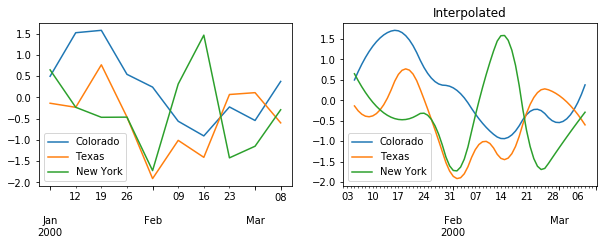

In [169]:
_, axes = plt.subplots(1,2, figsize=(10,3))
df.plot(ax=axes[0])
plt.title('Interpolated')
df.resample('D').interpolate(method='polynomial', order=2).plot(ax=axes[1]);

### <a id='m'>Moving Window Functions
<a href='#0'> Back to TOC

In [170]:
!head -n3 examples/stock_px_2.csv

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.4,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59


In [171]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',                            
                           parse_dates=True, index_col=0)
close_px_all.head()
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


#### Calculate Moving Average using rolling( ).mean( ) for Regular Time Series

Series

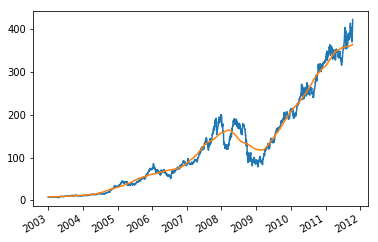

In [204]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250, center=True, min_periods=20).mean().plot();

In [202]:
close_px.AAPL.resample('250D').asfreq()

2003-01-02      7.40
2003-09-09     11.19
2004-05-16       NaN
2005-01-21     35.24
2005-09-28     51.08
2006-06-05     60.00
2007-02-10       NaN
2007-10-18    173.50
2008-06-24    173.25
2009-03-01       NaN
2009-11-06    194.34
2010-07-14    252.73
2011-03-21    339.30
Name: AAPL, dtype: float64

DataFrame

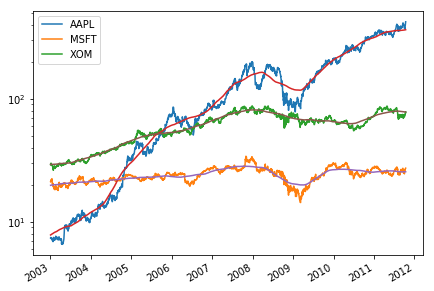

In [186]:
_, ax = plt.subplots(1,1,figsize=(7,5))
close_px.plot(ax=ax, logy=True)
close_px.rolling(250, center=True, min_periods=20).mean().plot(ax=ax, legend=False, logy=True);

rolling( ) can also work like resampling( ), taking an offset string. This is particularly useful for irregular time series.

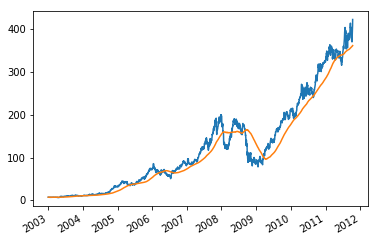

In [207]:
close_px.AAPL.plot()
close_px.AAPL.rolling('200D').mean().plot();

### Exponentially Weighted Functions
Instead of calculating uniformly weighted average within the window, we can use an exponentially weighted function to grant more weight to more recent observations. The resulted curve is more sensitive and more timely prompt regarding changes in the data.

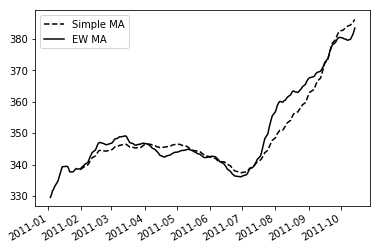

In [216]:
aapl_px = close_px.AAPL['2011':'2012']
ma60   = aapl_px.rolling(60, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=60).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend();

<a href='#0'> Back to TOC